# 1.线性回归
## 1.1最小二乘法

torch.Size([100, 1])
tensor([[1.6728]]) tensor([-122.5596])
tensor([[0.8622]])
tensor([0.8106])


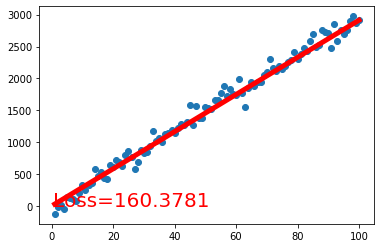

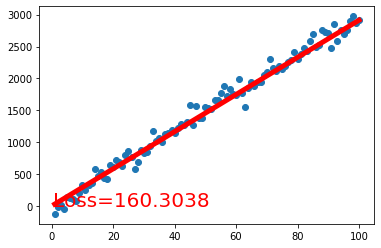

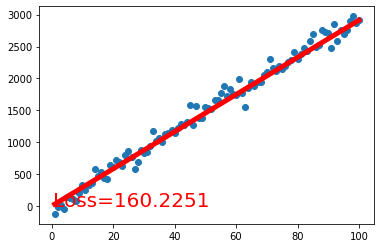

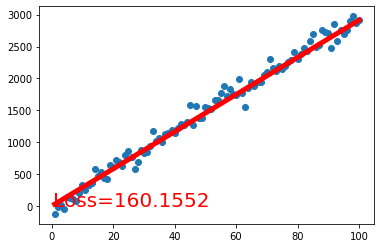

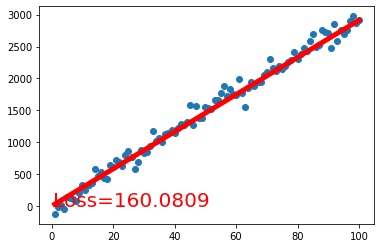

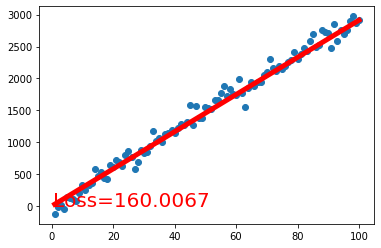

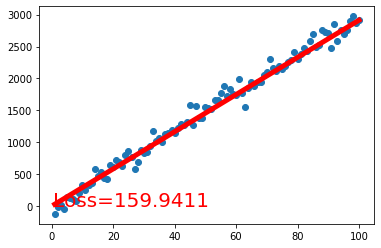

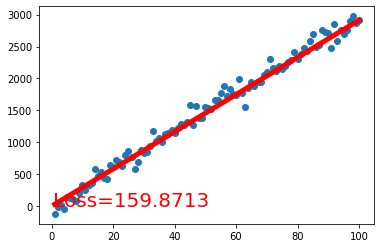

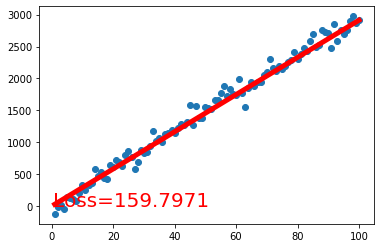

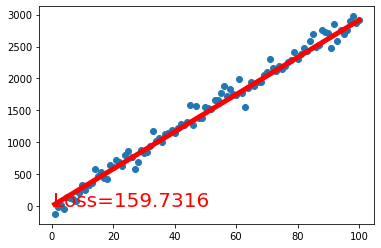

In [4]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(1)
x=torch.linspace(1,100,100).reshape(100,1)
y=30*x+100*torch.randn(100,1)
print(y.size())


w=torch.rand(1,1)
b=torch.rand(1)
print(w*x[0]+b,y[0])
print(w)
print(b)
plt.ion()
for i in range(100):
    prediction=torch.zeros((100,1))
    for j in range(100):
        prediction[j]=w*x[j]+b

        # print(prediction.size())
        loss=torch.mul(prediction[j]-y[j],prediction[j]-y[j])/2

        w=w+0.0001*(y[j]-prediction[j])*x[j]
        b=b+0.0001*(y[j]-prediction[j])
    if i % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        prediction=w*x+b
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.show()
        # plt.pause(0.1)

plt.ioff()



## 1.2 使用似然估计

torch.Size([100, 1])
tensor(-1014.3340)


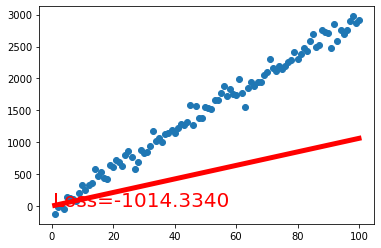

tensor(-1013.5452)
tensor(-1013.2000)
tensor(-1013.0488)
tensor(-1012.9827)
tensor(-1012.9537)
tensor(-1012.9410)
tensor(-1012.9354)
tensor(-1012.9330)
tensor(-1012.9320)
tensor(-1012.9316)


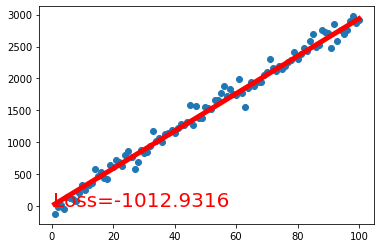

tensor(-1012.9314)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)


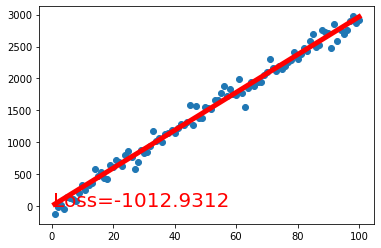

tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)


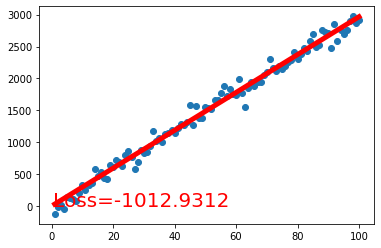

tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)


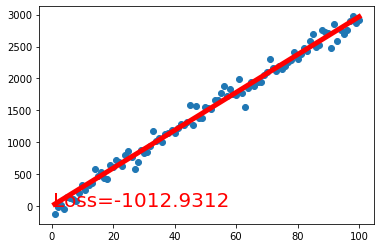

tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)


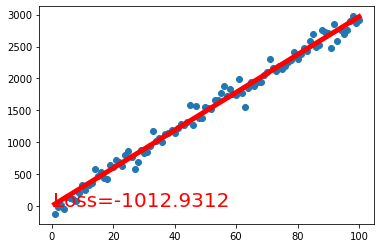

tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)


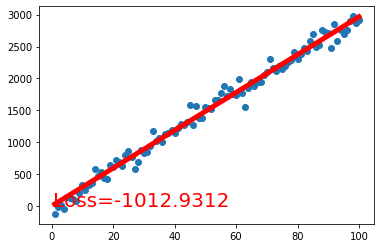

tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)


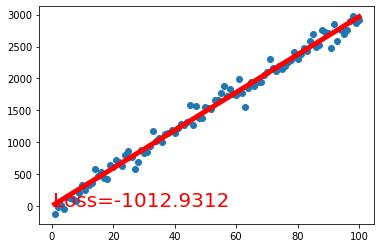

tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)


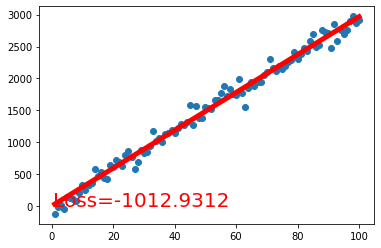

tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)


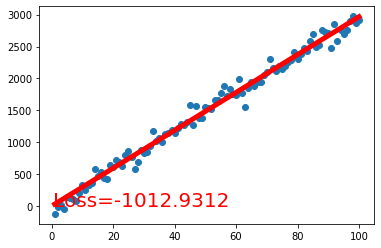

tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)
tensor(-1012.9312)


In [5]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(1)
x=torch.linspace(1,100,100).reshape(100,1)
y=30*x+100*torch.randn(100,1)
print(y.size())

w=torch.rand(1)
b=torch.rand(1)
delta=10000

plt.ion()
for i in range(100):
    prediction=w*x+b
    e=y-prediction
    p=1/torch.sqrt(torch.tensor(2*3.1415))/delta*torch.exp(-e*e/2/delta/delta)
    # print(p)
    Loss_log=torch.sum(torch.log(p))
    
    w = w + 0.000001 * torch.sum((y - prediction) * x)
    b = b + 0.000001 * torch.sum((y - prediction))
    if i % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        prediction=w*x+b
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % Loss_log.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.show()
plt.ioff()

## 1.3 局部加权线性回归LWR
locally weighted linear regression
$\Sigma_i\theta^i(y^i-w^Tx^i)^2$

torch.Size([100, 1])


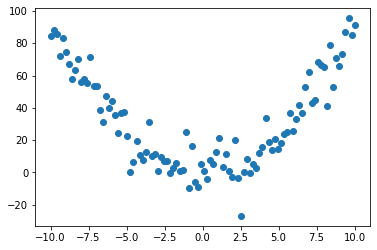

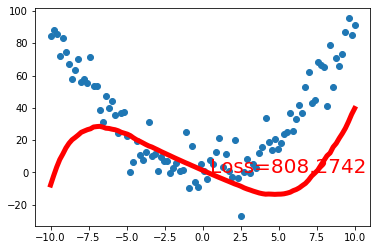

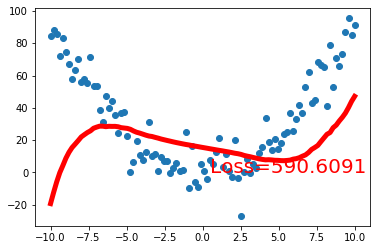

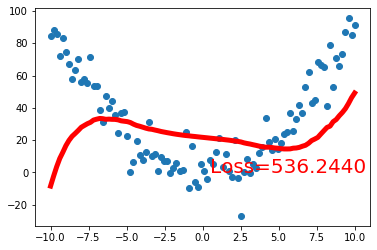

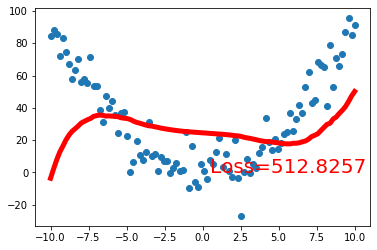

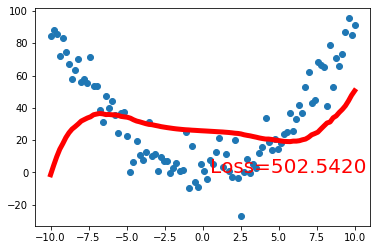

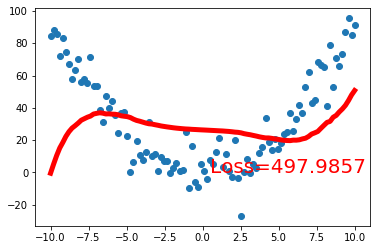

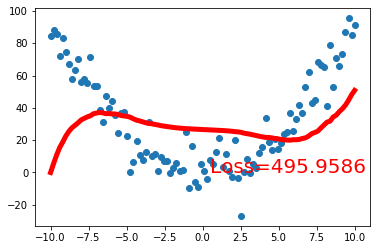

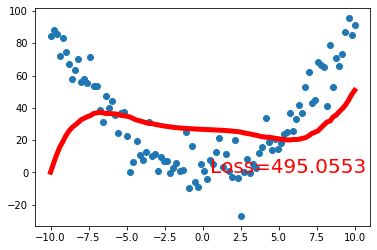

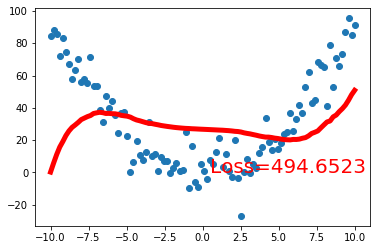

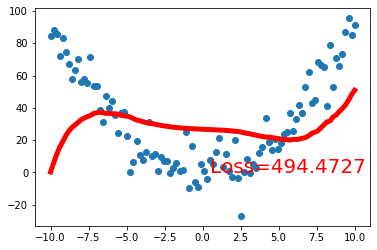

In [6]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(1)
x=torch.linspace(-10,10,100).reshape(100,1)
y=x*x+10*torch.randn(100,1)
print(y.size())
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

w=torch.rand(1,1)
b=torch.rand(1)
xm=torch.mean(x)
delta=10
theta=torch.exp(-(x-xm)*(x-xm)/2/delta/delta)


plt.ion()
for i in range(100):
    prediction=torch.zeros((100,1))
    for j in range(100):
        prediction[j]=w*x[j]+b

        # print(prediction.size())
        loss=theta[j]*torch.mul(prediction[j]-y[j],prediction[j]-y[j])/2

        w=w+0.001*theta[j]*(y[j]-prediction[j])*x[j]
        b=b+0.001*theta[j]*(y[j]-prediction[j])
    # prediction=w*x+b
    #
    # # print(prediction.size())
    # loss=torch.sum(theta*torch.mul(prediction-y,prediction-y))/2
    # w=w+0.0001*torch.sum(theta*(y-prediction)*x)
    # b=b+0.0001*torch.sum(theta*(y-prediction))
    if i % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())

        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.show()
        # plt.pause(0.1)

plt.ioff()



## 1.4非线性基函数

torch.Size([100, 1])


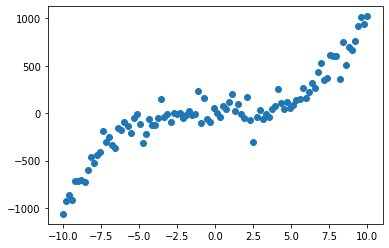

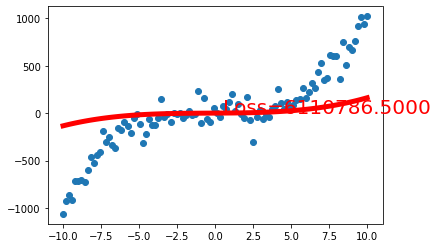

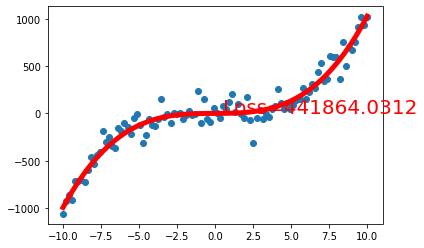

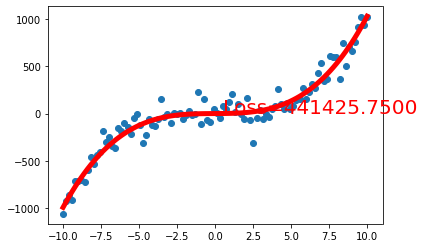

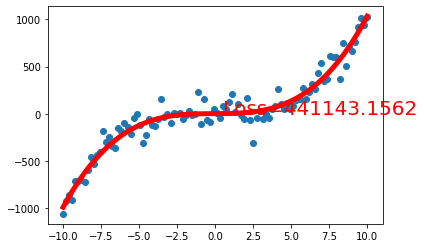

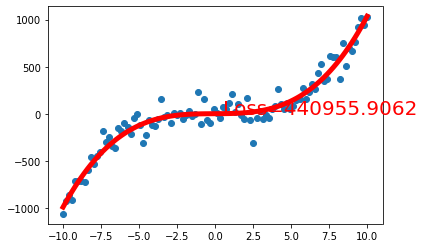

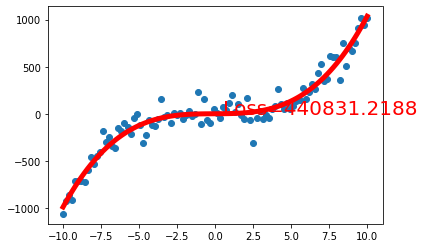

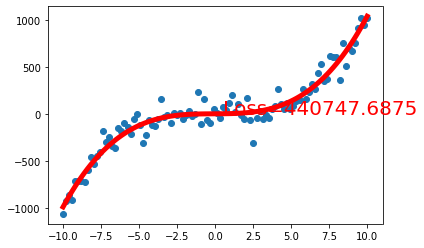

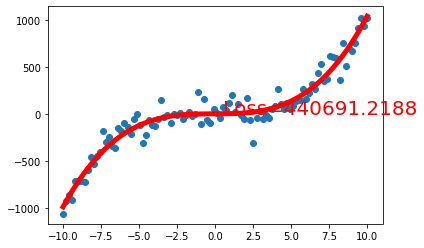

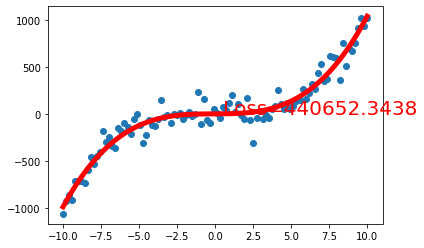

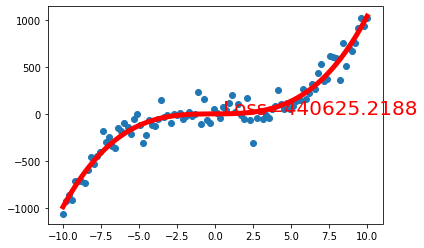

In [11]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(1)
x=torch.linspace(-10,10,100).reshape(100,1)
y=x*x+x+x*x*x+100*torch.randn(100,1)
print(y.size())
plt.scatter(x,y)
plt.show()

train_x=torch.cat((torch.cat((torch.ones(100,1),x),1),torch.cat((x*x,x*x*x),1)),1)

w=torch.rand(4,1)


plt.ion()
for i in range(100):
    # prediction=torch.zeros((100,1))

    prediction=torch.mm(train_x,w)
#     print(prediction[0])

    # print(prediction.size())
    loss=torch.sum(torch.mul(prediction-y,prediction-y))/2
    # print((y-prediction))

    # print(w)
    w=w+0.0000001*torch.sum((y-prediction)*train_x,0).resize(4,1)
#     print(w)
#     print()
    if i % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())

        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.show()
        # plt.pause(0.1)

plt.ioff()



# 2分类问题
## 2.1 最大似然——逻辑回归

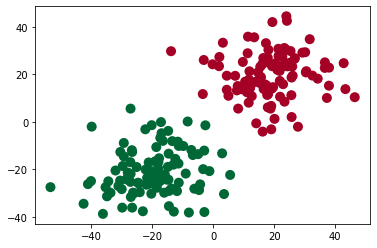

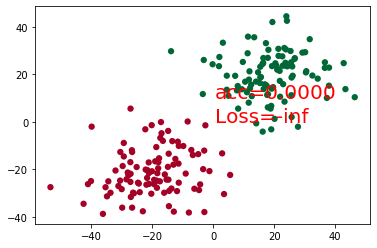

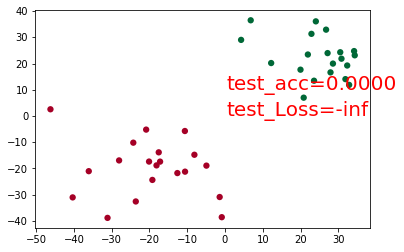

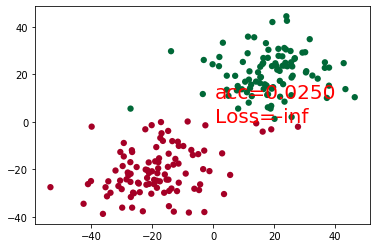

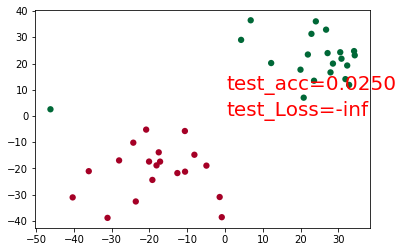

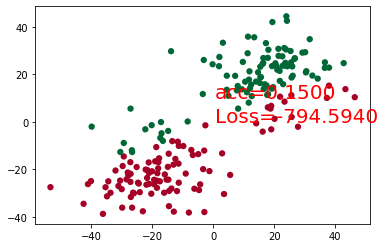

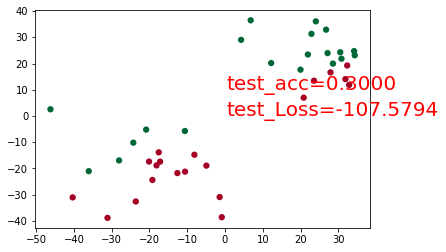

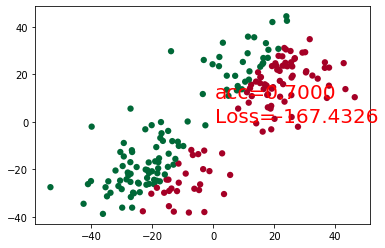

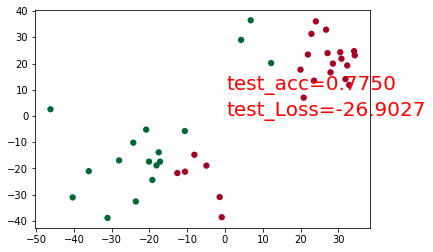

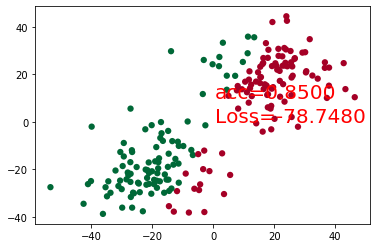

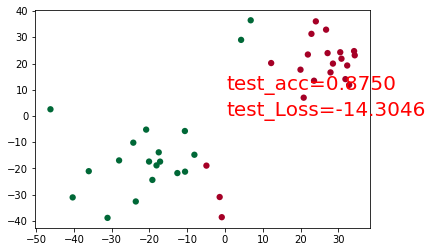

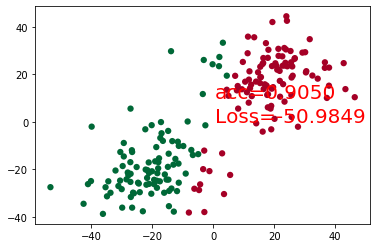

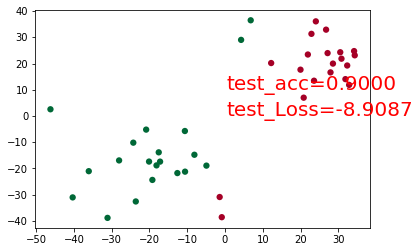

In [24]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(1)
x=torch.cat((torch.randn(100,2)*10-20,torch.randn(100,2)*10+20),0)
y=torch.cat((torch.ones(100),torch.zeros(100)))

test_x=torch.cat((torch.randn(20,2)*10-20,torch.randn(20,2)*10+20),0)
test_y=torch.cat((torch.ones(20),torch.zeros(20)))
# y=y[torch.randperm(100)]
# print(x)
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()

# train_x=torch.cat((torch.cat((torch.ones(100,1),x),1),torch.cat((x*x,x*x*x),1)),1)
#
# w=torch.rand(4,1)
#
#
w=torch.rand(2,1)
plt.ion()
for i in range(30):
    # prediction=torch.zeros((100,1))

    p=torch.sigmoid(torch.mm(x,w))

    prediction=torch.zeros(p.size())
    prediction[torch.gt(p,0.5)]=1
    acc=torch.sum(torch.eq(prediction.resize(200),y).float())/200
    # print(acc)
    loss=torch.sum(y.resize(200,1)*torch.log(p)+(1-y.resize(200,1))*torch.log(1-p))
    # print(loss)

    w=w+0.00001*torch.sum((y.resize(200,1)-p)*x,0).resize(2,1)
    # print(w)
    # print(prediction)
    #
    # # print(prediction.size())
    # loss=torch.sum(torch.mul(prediction-y,prediction-y))/2
    # # print((y-prediction))
    #
    # # print(w)
    # w=w+0.0000001*torch.sum((y-prediction)*train_x,0).resize(4,1)
    # print(w)
    # print()

    if i % 5 == 0:
        # plot and show learning process
        plt.cla()
        
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=prediction.resize(200).int(), s=40, lw=0, cmap='RdYlGn')
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.text(0.5, 10, 'acc=%.4f' % acc.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.show()
        
        
        p_test=torch.sigmoid(torch.mm(test_x,w))
        prediction_test=torch.zeros(p_test.size())
        prediction_test[torch.gt(p_test,0.5)]=1
        test_acc=torch.sum(torch.eq(prediction_test.resize(40),test_y).float())/40
        test_loss=torch.sum(test_y.resize(40,1)*torch.log(p_test)+(1-test_y.resize(40,1))*torch.log(1-p_test))
        plt.scatter(test_x.data.numpy()[:, 0], test_x.data.numpy()[:, 1], c=prediction_test.resize(40).int(), s=40, lw=0, cmap='RdYlGn')
        plt.text(0.5, 0, 'test_Loss=%.4f' % test_loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.text(0.5, 10, 'test_acc=%.4f' % test_acc.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.show()
        # plt.pause(0.1)

plt.ioff()

